# Reinforcement Learning: Zero to Hero - Part 14/17

**Cells 221-240 of 291**



In [118]:
# Train the trading agent
np.random.seed(42)

env = SimpleTradingEnv(n_steps=252)  # One year of trading
agent = TradingQLearningAgent(state_dim=16)

n_episodes = 200
episode_returns = []
episode_sharpes = []

print("Training Trading Agent...")
print("="*50)

for episode in range(n_episodes):
    state = env.reset()
    done = False
    daily_returns = []
    
    while not done:
        action = agent.get_action(state)
        next_state, reward, done, info = env.step(action)
        agent.update(state, action, reward, next_state, done)
        daily_returns.append(info['daily_return'])
        state = next_state
    
    total_return = info['total_return']
    episode_returns.append(total_return)
    
    # Calculate Sharpe ratio (annualized)
    if len(daily_returns) > 1 and np.std(daily_returns) > 0:
        sharpe = np.mean(daily_returns) / np.std(daily_returns) * np.sqrt(252)
    else:
        sharpe = 0
    episode_sharpes.append(sharpe)
    
    if (episode + 1) % 40 == 0:
        avg_return = np.mean(episode_returns[-40:]) * 100
        avg_sharpe = np.mean(episode_sharpes[-40:])
        print(f"Episode {episode+1:3d} | Avg Return: {avg_return:6.1f}% | "
              f"Avg Sharpe: {avg_sharpe:.2f} | Epsilon: {agent.epsilon:.3f}")

print("\nTraining complete!")

Training Trading Agent...
Episode  40 | Avg Return:    1.3% | Avg Sharpe: 0.15 | Epsilon: 0.818
Episode  80 | Avg Return:    3.7% | Avg Sharpe: 0.26 | Epsilon: 0.670
Episode 120 | Avg Return:   19.5% | Avg Sharpe: 1.01 | Epsilon: 0.548
Episode 160 | Avg Return:   32.4% | Avg Sharpe: 1.50 | Epsilon: 0.448
Episode 200 | Avg Return:   38.9% | Avg Sharpe: 1.84 | Epsilon: 0.367

Training complete!


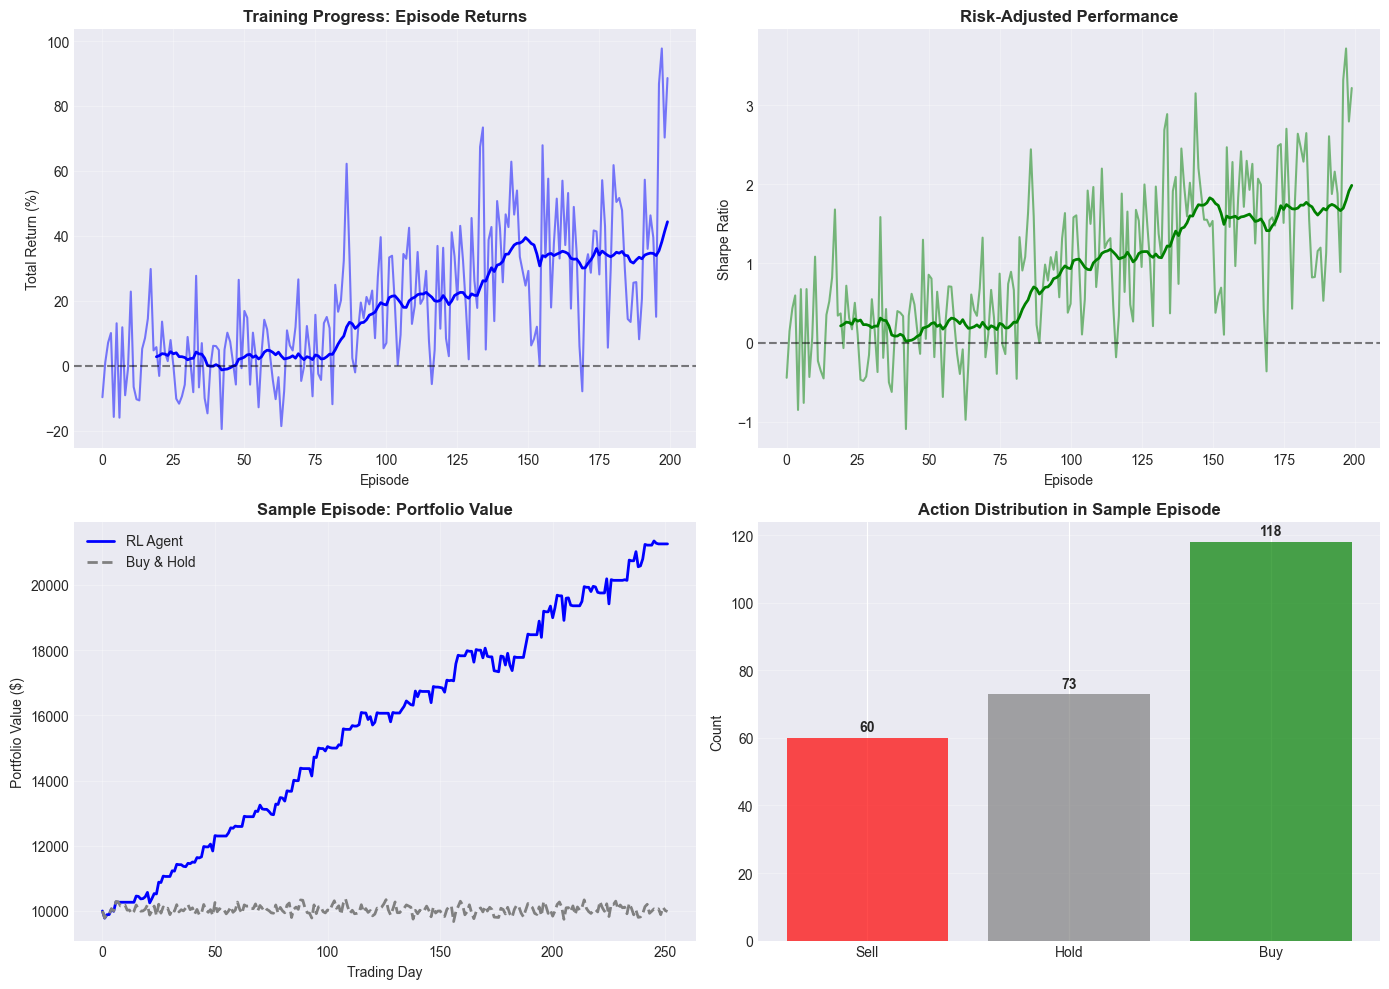


📊 Sample Episode Results:
   RL Agent Return: +112.6%
   Buy & Hold Return: +1.2%
   Outperformance: +111.4%

   Actions: 118 buys, 60 sells, 73 holds


In [119]:
# Visualize trading performance
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Episode returns
ax1 = axes[0, 0]
ax1.plot(np.array(episode_returns) * 100, alpha=0.5, color='blue')
window = 20
smoothed = np.convolve(episode_returns, np.ones(window)/window, mode='valid')
ax1.plot(range(window-1, len(episode_returns)), np.array(smoothed) * 100, 
         color='blue', linewidth=2)
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax1.set_xlabel('Episode')
ax1.set_ylabel('Total Return (%)')
ax1.set_title('Training Progress: Episode Returns', fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot 2: Sharpe ratios
ax2 = axes[0, 1]
ax2.plot(episode_sharpes, alpha=0.5, color='green')
smoothed_sharpe = np.convolve(episode_sharpes, np.ones(window)/window, mode='valid')
ax2.plot(range(window-1, len(episode_sharpes)), smoothed_sharpe, 
         color='green', linewidth=2)
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax2.set_xlabel('Episode')
ax2.set_ylabel('Sharpe Ratio')
ax2.set_title('Risk-Adjusted Performance', fontweight='bold')
ax2.grid(True, alpha=0.3)

# Plot 3: Sample trading episode - portfolio value
ax3 = axes[1, 0]
np.random.seed(456)
state = env.reset()
done = False
actions_taken = []

while not done:
    action = agent.get_action(state, training=False)
    actions_taken.append(action)
    state, _, done, info = env.step(action)

# Plot portfolio value
ax3.plot(env.portfolio_values, color='blue', linewidth=2, label='RL Agent')

# Buy and hold baseline
buy_hold_values = [env.initial_cash]
shares_bh = env.initial_cash / env.prices[env.lookback]
for i in range(env.lookback + 1, len(env.prices)):
    buy_hold_values.append(shares_bh * env.prices[i])
ax3.plot(buy_hold_values[:len(env.portfolio_values)], color='gray', 
         linewidth=2, linestyle='--', label='Buy & Hold')

ax3.set_xlabel('Trading Day')
ax3.set_ylabel('Portfolio Value ($)')
ax3.set_title('Sample Episode: Portfolio Value', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Action distribution
ax4 = axes[1, 1]
action_names = ['Sell', 'Hold', 'Buy']
action_counts = [actions_taken.count(i) for i in range(3)]
colors = ['red', 'gray', 'green']
bars = ax4.bar(action_names, action_counts, color=colors, alpha=0.7)
ax4.set_ylabel('Count')
ax4.set_title('Action Distribution in Sample Episode', fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

for bar, count in zip(bars, action_counts):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Performance comparison
rl_return = (env.portfolio_values[-1] - env.initial_cash) / env.initial_cash * 100
bh_return = (buy_hold_values[-1] - env.initial_cash) / env.initial_cash * 100

print(f"\n📊 Sample Episode Results:")
print(f"   RL Agent Return: {rl_return:+.1f}%")
print(f"   Buy & Hold Return: {bh_return:+.1f}%")
print(f"   Outperformance: {rl_return - bh_return:+.1f}%")
print(f"\n   Actions: {action_counts[2]} buys, {action_counts[0]} sells, {action_counts[1]} holds")

<a id='recommendations'></a>
### Recommendation Systems

**Personalization with RL**

Traditional recommendation systems use collaborative filtering or content-based methods. RL-based recommendations offer key advantages:

**Why RL for Recommendations?**

1. **Long-term Engagement**: Optimize for user retention, not just immediate clicks
2. **Exploration**: Discover user preferences through strategic exploration
3. **Adaptation**: Continuously adapt to changing user preferences
4. **Sequential Nature**: Account for how recommendations affect future behavior

**The Exploration-Exploitation Dilemma in Recommendations:**

| Exploitation | Exploration |
|--------------|-------------|
| Recommend items similar to past likes | Try new item categories |
| High short-term engagement | Discover hidden preferences |
| Risk of filter bubbles | May show irrelevant items |
| User satisfaction now | User satisfaction long-term |

**MDP Formulation:**

**State**: User profile, interaction history, context (time, device)

**Action**: Which item(s) to recommend

**Reward**: 
- Clicks, purchases, ratings
- Watch time, engagement duration
- Return visits, subscription retention

**Challenges:**
- Large action space (millions of items)
- Sparse rewards (most items not interacted with)
- Delayed feedback (subscription churn happens later)
- Fairness and diversity concerns

In [120]:
# Simple Recommendation Environment
import numpy as np
import matplotlib.pyplot as plt

class SimpleRecommendationEnv:
    """
    A simplified recommendation environment.
    
    Simulates a user with hidden preferences across item categories.
    The agent must learn these preferences through recommendations.
    """
    
    def __init__(self, n_items=20, n_categories=5):
        """
        Args:
            n_items: Total number of items
            n_categories: Number of item categories
        """
        self.n_items = n_items
        self.n_categories = n_categories
        
        # Assign items to categories
        self.item_categories = np.random.randint(0, n_categories, n_items)
        
        # Item quality (affects click probability)
        self.item_quality = np.random.uniform(0.3, 0.9, n_items)
        
        self.reset()
    
    def reset(self):
        """Reset with a new user."""
        # User's hidden category preferences (unknown to agent)
        self.user_preferences = np.random.dirichlet(np.ones(self.n_categories))
        
        # User's interaction history
        self.interaction_history = []
        self.clicks = []
        self.step_count = 0
        self.max_steps = 50
        
        return self._get_state()
    
    def _get_state(self):
        """Return current state based on interaction history."""
        # Category click rates from history
        category_clicks = np.zeros(self.n_categories)
        category_shows = np.zeros(self.n_categories) + 0.1  # Smoothing
        
        for item, clicked in zip(self.interaction_history, self.clicks):
            cat = self.item_categories[item]
            category_shows[cat] += 1
            if clicked:
                category_clicks[cat] += 1
        
        click_rates = category_clicks / category_shows
        
        # Overall engagement
        total_clicks = sum(self.clicks)
        total_shows = len(self.clicks) + 1
        overall_ctr = total_clicks / total_shows
        
        state = np.concatenate([
            click_rates,
            [overall_ctr],
            [self.step_count / self.max_steps]
        ])
        
        return state.astype(np.float32)
    
    def step(self, action):
        """
        Recommend an item.
        
        Args:
            action: Item index to recommend
            
        Returns:
            state, reward, done, info
        """
        self.step_count += 1
        
        # Get item properties
        item_cat = self.item_categories[action]
        item_qual = self.item_quality[action]
        
        # Click probability based on user preference and item quality
        base_prob = self.user_preferences[item_cat]
        click_prob = base_prob * item_qual
        
        # Add some noise and fatigue (repeated items less likely to be clicked)
        times_shown = self.interaction_history.count(action)
        fatigue = 0.8 ** times_shown  # Diminishing returns
        click_prob *= fatigue
        
        # Simulate click
        clicked = np.random.random() < click_prob
        
        self.interaction_history.append(action)
        self.clicks.append(clicked)
        
        # Reward
        reward = 1.0 if clicked else -0.1
        
        # Bonus for diversity (exploring different categories)
        recent_cats = [self.item_categories[i] for i in self.interaction_history[-5:]]
        diversity_bonus = len(set(recent_cats)) / 5 * 0.2
        reward += diversity_bonus
        
        done = self.step_count >= self.max_steps
        
        info = {
            'clicked': clicked,
            'item_category': item_cat,
            'click_prob': click_prob,
            'total_clicks': sum(self.clicks),
            'ctr': sum(self.clicks) / len(self.clicks)
        }
        
        return self._get_state(), reward, done, info


class RecommendationAgent:
    """Epsilon-greedy agent with UCB exploration for recommendations."""
    
    def __init__(self, n_items, lr=0.1, epsilon=0.3):
        self.n_items = n_items
        self.lr = lr
        self.epsilon = epsilon
        
        # Track item performance
        self.item_values = np.zeros(n_items)
        self.item_counts = np.zeros(n_items)
        self.total_steps = 0
    
    def get_action(self, state, training=True):
        """Select item using UCB-style exploration."""
        self.total_steps += 1
        
        if training and np.random.random() < self.epsilon:
            return np.random.randint(self.n_items)
        
        # UCB scores
        ucb_scores = self.item_values.copy()
        
        # Add exploration bonus for less-tried items
        for i in range(self.n_items):
            if self.item_counts[i] > 0:
                exploration_bonus = np.sqrt(2 * np.log(self.total_steps) / self.item_counts[i])
                ucb_scores[i] += exploration_bonus
            else:
                ucb_scores[i] = float('inf')  # Try untried items
        
        return np.argmax(ucb_scores)
    
    def update(self, action, reward):
        """Update item value estimates."""
        self.item_counts[action] += 1
        n = self.item_counts[action]
        
        # Incremental average update
        self.item_values[action] += (1/n) * (reward - self.item_values[action])


print("Recommendation Environment created!")
print("\nFeatures:")
print(f"  - {20} items across {5} categories")
print("  - Users have hidden category preferences")
print("  - Click probability depends on preference + item quality")
print("  - Fatigue effect for repeated recommendations")
print("  - Diversity bonus in rewards")

Recommendation Environment created!

Features:
  - 20 items across 5 categories
  - Users have hidden category preferences
  - Click probability depends on preference + item quality
  - Fatigue effect for repeated recommendations
  - Diversity bonus in rewards


In [121]:
# Train the recommendation agent
np.random.seed(42)

env = SimpleRecommendationEnv(n_items=20, n_categories=5)
agent = RecommendationAgent(n_items=20)

n_episodes = 200
episode_ctrs = []
episode_rewards = []

print("Training Recommendation Agent...")
print("="*50)

for episode in range(n_episodes):
    state = env.reset()
    total_reward = 0
    done = False
    
    while not done:
        action = agent.get_action(state)
        next_state, reward, done, info = env.step(action)
        agent.update(action, reward)
        total_reward += reward
        state = next_state
    
    episode_ctrs.append(info['ctr'])
    episode_rewards.append(total_reward)
    
    if (episode + 1) % 40 == 0:
        avg_ctr = np.mean(episode_ctrs[-40:]) * 100
        avg_reward = np.mean(episode_rewards[-40:])
        print(f"Episode {episode+1:3d} | Avg CTR: {avg_ctr:5.1f}% | Avg Reward: {avg_reward:6.1f}")

print("\nTraining complete!")

Training Recommendation Agent...
Episode  40 | Avg CTR:  10.1% | Avg Reward:    6.3
Episode  80 | Avg CTR:   9.2% | Avg Reward:    5.6
Episode 120 | Avg CTR:  10.1% | Avg Reward:    5.8
Episode 160 | Avg CTR:   8.8% | Avg Reward:    5.0
Episode 200 | Avg CTR:   8.9% | Avg Reward:    5.2

Training complete!


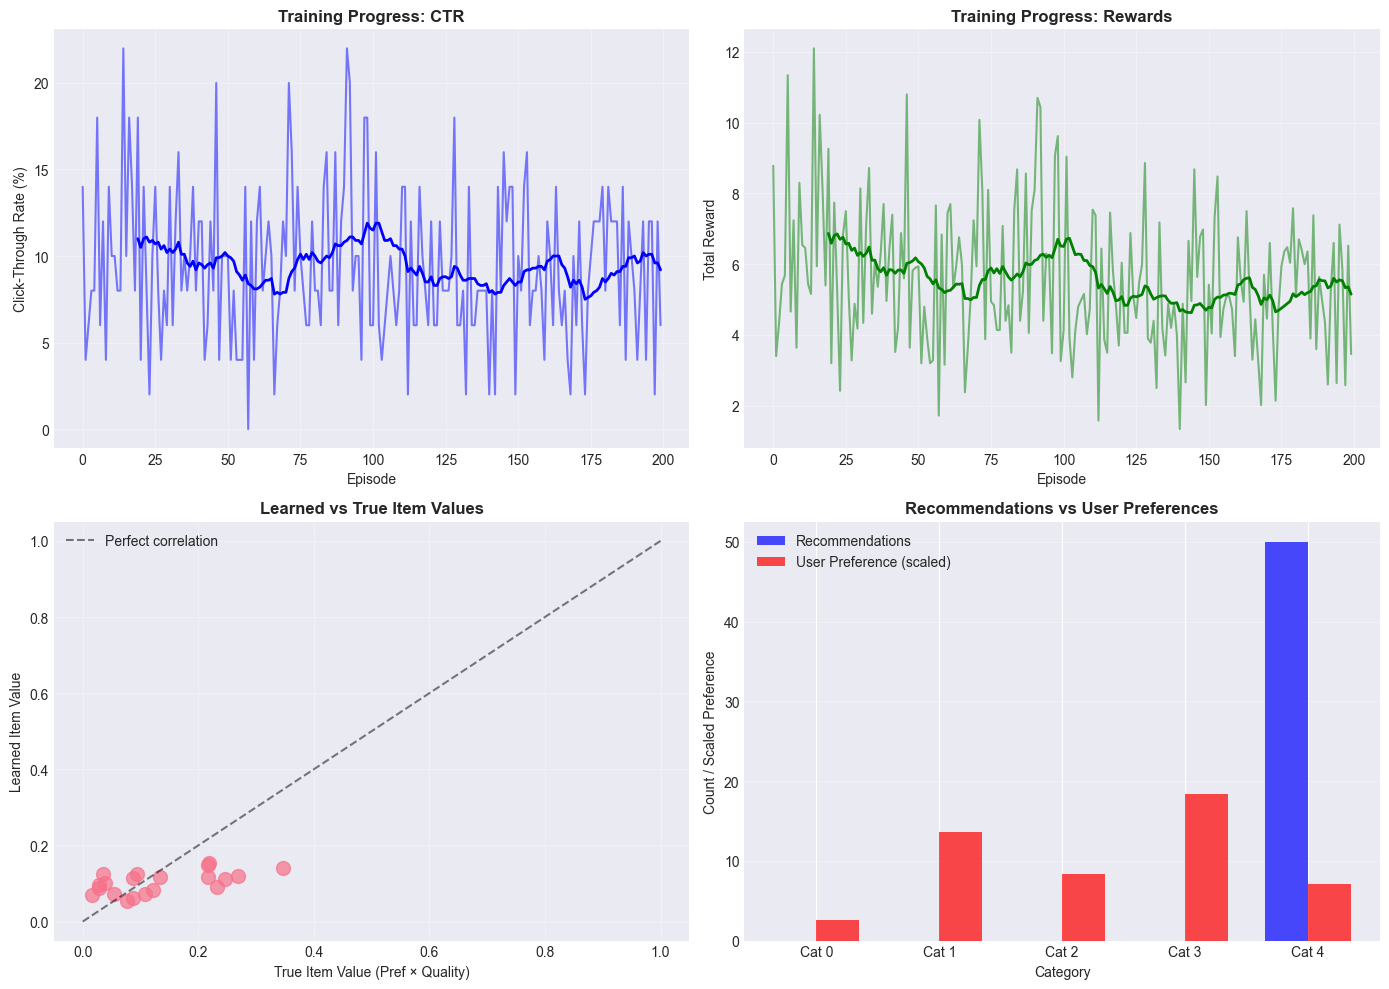


📊 Performance Comparison:
   Random Policy CTR: 8.5%
   RL Agent CTR:      1.4%
   Improvement:       -7.0%


In [122]:
# Visualize recommendation performance
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: CTR over episodes
ax1 = axes[0, 0]
ax1.plot(np.array(episode_ctrs) * 100, alpha=0.5, color='blue')
window = 20
smoothed_ctr = np.convolve(episode_ctrs, np.ones(window)/window, mode='valid')
ax1.plot(range(window-1, len(episode_ctrs)), np.array(smoothed_ctr) * 100,
         color='blue', linewidth=2)
ax1.set_xlabel('Episode')
ax1.set_ylabel('Click-Through Rate (%)')
ax1.set_title('Training Progress: CTR', fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot 2: Rewards
ax2 = axes[0, 1]
ax2.plot(episode_rewards, alpha=0.5, color='green')
smoothed_rewards = np.convolve(episode_rewards, np.ones(window)/window, mode='valid')
ax2.plot(range(window-1, len(episode_rewards)), smoothed_rewards,
         color='green', linewidth=2)
ax2.set_xlabel('Episode')
ax2.set_ylabel('Total Reward')
ax2.set_title('Training Progress: Rewards', fontweight='bold')
ax2.grid(True, alpha=0.3)

# Plot 3: Learned item values vs true quality
ax3 = axes[1, 0]
# Run a test episode to see learned values
state = env.reset()
true_values = env.user_preferences[env.item_categories] * env.item_quality

ax3.scatter(true_values, agent.item_values, alpha=0.7, s=100)
ax3.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Perfect correlation')
ax3.set_xlabel('True Item Value (Pref × Quality)')
ax3.set_ylabel('Learned Item Value')
ax3.set_title('Learned vs True Item Values', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Category exploration
ax4 = axes[1, 1]
# Run test episode
state = env.reset()
done = False
recommended_cats = []

while not done:
    action = agent.get_action(state, training=False)
    recommended_cats.append(env.item_categories[action])
    state, _, done, _ = env.step(action)

# Count recommendations per category
cat_counts = [recommended_cats.count(i) for i in range(env.n_categories)]
cat_prefs = env.user_preferences

x = np.arange(env.n_categories)
width = 0.35

bars1 = ax4.bar(x - width/2, cat_counts, width, label='Recommendations', color='blue', alpha=0.7)
bars2 = ax4.bar(x + width/2, cat_prefs * 50, width, label='User Preference (scaled)', color='red', alpha=0.7)

ax4.set_xlabel('Category')
ax4.set_ylabel('Count / Scaled Preference')
ax4.set_title('Recommendations vs User Preferences', fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels([f'Cat {i}' for i in range(env.n_categories)])
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Compare with random baseline
print("\n📊 Performance Comparison:")
random_ctrs = []
for _ in range(50):
    state = env.reset()
    done = False
    while not done:
        action = np.random.randint(env.n_items)
        state, _, done, info = env.step(action)
    random_ctrs.append(info['ctr'])

agent_ctrs = []
for _ in range(50):
    state = env.reset()
    done = False
    while not done:
        action = agent.get_action(state, training=False)
        state, _, done, info = env.step(action)
    agent_ctrs.append(info['ctr'])

print(f"   Random Policy CTR: {np.mean(random_ctrs)*100:.1f}%")
print(f"   RL Agent CTR:      {np.mean(agent_ctrs)*100:.1f}%")
print(f"   Improvement:       {(np.mean(agent_ctrs) - np.mean(random_ctrs))*100:+.1f}%")

<a id='healthcare'></a>
### Healthcare Applications

**RL for Treatment Optimization**

Healthcare presents unique opportunities for RL to improve patient outcomes through personalized treatment strategies.

**Key Application Areas:**

1. **Dynamic Treatment Regimes (DTRs)**
   - Personalized treatment sequences
   - Adapting to patient response
   - Chronic disease management

2. **Clinical Trial Optimization**
   - Adaptive trial designs
   - Dose-finding studies
   - Patient allocation

3. **Resource Allocation**
   - ICU bed management
   - Staff scheduling
   - Equipment utilization

**Challenges in Healthcare RL:**

| Challenge | Description | Mitigation |
|-----------|-------------|------------|
| Safety | Wrong decisions can harm patients | Conservative policies, human oversight |
| Data scarcity | Limited patient data | Transfer learning, simulation |
| Delayed outcomes | Treatment effects take time | Appropriate discount factors |
| Interpretability | Doctors need to understand decisions | Explainable RL methods |
| Heterogeneity | Patients respond differently | Personalized policies |

**Clinical Trial Applications:**

- **Adaptive Randomization**: Allocate more patients to better-performing treatments
- **Response-Adaptive Designs**: Modify trial based on interim results
- **Biomarker-Guided Trials**: Personalize treatment based on patient characteristics

**Ethical Considerations:**
- Patient consent and autonomy
- Fairness across patient populations
- Transparency in decision-making
- Regulatory compliance (FDA, EMA)

In [123]:
# Simplified Treatment Policy Example
import numpy as np
import matplotlib.pyplot as plt

class SimpleTreatmentEnv:
    """
    Simplified treatment environment for chronic disease management.
    
    Models a patient whose health state evolves based on treatment decisions.
    This is a highly simplified model for educational purposes.
    """
    
    def __init__(self):
        # Health state ranges from 0 (critical) to 100 (healthy)
        self.min_health = 0
        self.max_health = 100
        
        # Treatment options
        self.treatments = {
            0: {'name': 'No treatment', 'effect': -5, 'side_effect': 0, 'cost': 0},
            1: {'name': 'Mild treatment', 'effect': 5, 'side_effect': 2, 'cost': 1},
            2: {'name': 'Moderate treatment', 'effect': 15, 'side_effect': 5, 'cost': 3},
            3: {'name': 'Aggressive treatment', 'effect': 25, 'side_effect': 10, 'cost': 5}
        }
        
        self.reset()
    
    def reset(self):
        """Reset patient to initial state."""
        # Patient starts with moderate health
        self.health = np.random.uniform(40, 60)
        self.side_effects = 0
        self.total_cost = 0
        self.step_count = 0
        self.max_steps = 20  # Treatment period
        
        # Patient-specific response (hidden from agent)
        self.treatment_sensitivity = np.random.uniform(0.8, 1.2)
        self.side_effect_sensitivity = np.random.uniform(0.8, 1.2)
        
        return self._get_state()
    
    def _get_state(self):
        """Return observable state."""
        return np.array([
            self.health / self.max_health,
            self.side_effects / 20,  # Normalized side effects
            self.step_count / self.max_steps
        ], dtype=np.float32)
    
    def step(self, action):
        """Apply treatment and observe outcome."""
        self.step_count += 1
        
        treatment = self.treatments[action]
        
        # Apply treatment effect (with patient-specific response)
        effect = treatment['effect'] * self.treatment_sensitivity
        effect += np.random.normal(0, 3)  # Random variation
        
        # Apply side effects
        side_effect = treatment['side_effect'] * self.side_effect_sensitivity
        side_effect += np.random.normal(0, 1)
        
        # Update health
        self.health = np.clip(self.health + effect - side_effect, 
                              self.min_health, self.max_health)
        
        # Accumulate side effects (they persist)
        self.side_effects = max(0, self.side_effects + side_effect * 0.5 - 1)
        
        # Track cost
        self.total_cost += treatment['cost']
        
        # Natural disease progression (health tends to decline without treatment)
        self.health -= 3
        self.health = max(self.min_health, self.health)
        
        # Reward: health improvement minus side effects and cost
        reward = self.health / 100 - self.side_effects / 20 - treatment['cost'] / 10
        
        # Bonus for maintaining good health
        if self.health > 70:
            reward += 0.5
        
        # Penalty for critical health
        if self.health < 30:
            reward -= 1.0
        
        done = self.step_count >= self.max_steps or self.health <= 0
        
        info = {
            'health': self.health,
            'side_effects': self.side_effects,
            'total_cost': self.total_cost,
            'treatment': treatment['name']
        }
        
        return self._get_state(), reward, done, info


class TreatmentPolicyAgent:
    """Simple Q-learning agent for treatment decisions."""
    
    def __init__(self, n_actions=4, lr=0.1, gamma=0.95, epsilon=1.0):
        self.n_actions = n_actions
        self.lr = lr
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = 0.05
        self.epsilon_decay = 0.99
        
        self.q_table = {}
    
    def _discretize_state(self, state):
        """Discretize continuous state."""
        health_bin = int(state[0] * 10)  # 0-10
        side_effect_bin = int(state[1] * 5)  # 0-5
        time_bin = int(state[2] * 4)  # 0-4
        return (health_bin, side_effect_bin, time_bin)
    
    def get_action(self, state, training=True):
        """Select action."""
        if training and np.random.random() < self.epsilon:
            return np.random.randint(self.n_actions)
        
        discrete_state = self._discretize_state(state)
        if discrete_state not in self.q_table:
            self.q_table[discrete_state] = np.zeros(self.n_actions)
        
        return np.argmax(self.q_table[discrete_state])
    
    def update(self, state, action, reward, next_state, done):
        """Update Q-values."""
        discrete_state = self._discretize_state(state)
        discrete_next = self._discretize_state(next_state)
        
        if discrete_state not in self.q_table:
            self.q_table[discrete_state] = np.zeros(self.n_actions)
        if discrete_next not in self.q_table:
            self.q_table[discrete_next] = np.zeros(self.n_actions)
        
        if done:
            target = reward
        else:
            target = reward + self.gamma * np.max(self.q_table[discrete_next])
        
        self.q_table[discrete_state][action] += self.lr * (
            target - self.q_table[discrete_state][action]
        )
        
        if done:
            self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)


print("Treatment Environment created!")
print("\nTreatment options:")
for i, t in enumerate([
    "No treatment (natural progression)",
    "Mild treatment (low effect, low side effects)",
    "Moderate treatment (medium effect, medium side effects)",
    "Aggressive treatment (high effect, high side effects)"
]):
    print(f"  {i}: {t}")

Treatment Environment created!

Treatment options:
  0: No treatment (natural progression)
  1: Mild treatment (low effect, low side effects)
  2: Moderate treatment (medium effect, medium side effects)
  3: Aggressive treatment (high effect, high side effects)


Training Treatment Policy...
Episode  60 | Avg Final Health:  66.3 | Avg Reward:   1.71 | Epsilon: 0.547
Episode 120 | Avg Final Health:  59.9 | Avg Reward:   6.30 | Epsilon: 0.299
Episode 180 | Avg Final Health:  56.3 | Avg Reward:   5.17 | Epsilon: 0.164
Episode 240 | Avg Final Health:  53.5 | Avg Reward:   6.36 | Epsilon: 0.090
Episode 300 | Avg Final Health:  51.7 | Avg Reward:   6.85 | Epsilon: 0.050

Training complete!


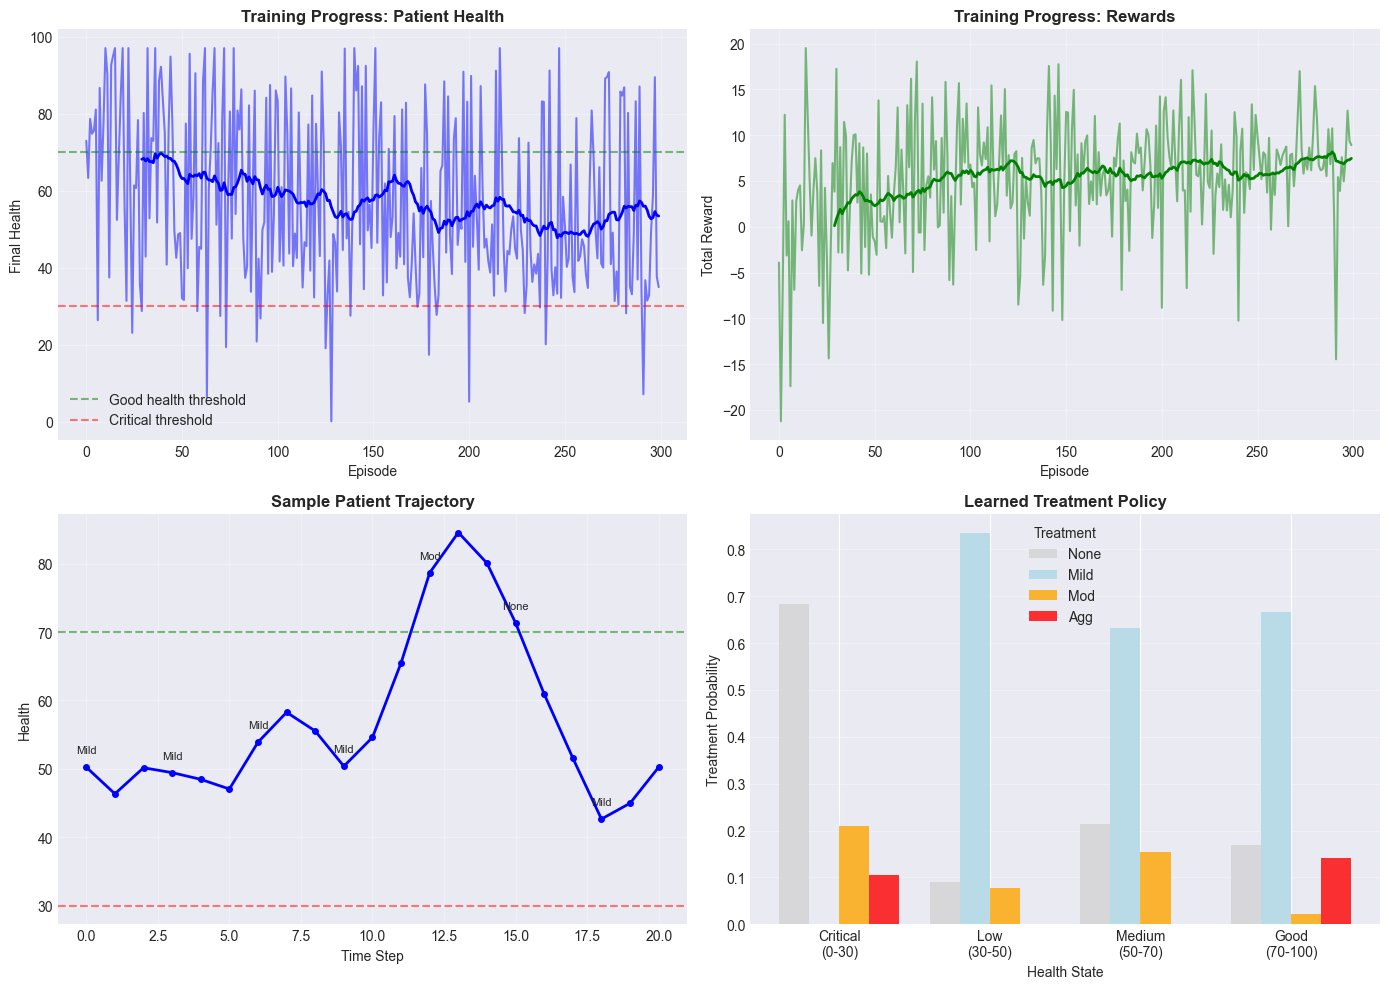


📊 Policy Interpretation:
   The agent learns to apply more aggressive treatment when health is low,
   and reduce treatment intensity as health improves to minimize side effects.


In [124]:
# Train treatment policy
np.random.seed(42)

env = SimpleTreatmentEnv()
agent = TreatmentPolicyAgent()

n_episodes = 300
episode_health = []
episode_rewards = []

print("Training Treatment Policy...")
print("="*50)

for episode in range(n_episodes):
    state = env.reset()
    total_reward = 0
    done = False
    
    while not done:
        action = agent.get_action(state)
        next_state, reward, done, info = env.step(action)
        agent.update(state, action, reward, next_state, done)
        total_reward += reward
        state = next_state
    
    episode_health.append(info['health'])
    episode_rewards.append(total_reward)
    
    if (episode + 1) % 60 == 0:
        avg_health = np.mean(episode_health[-60:])
        avg_reward = np.mean(episode_rewards[-60:])
        print(f"Episode {episode+1:3d} | Avg Final Health: {avg_health:5.1f} | "
              f"Avg Reward: {avg_reward:6.2f} | Epsilon: {agent.epsilon:.3f}")

print("\nTraining complete!")

# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Final health over episodes
ax1 = axes[0, 0]
ax1.plot(episode_health, alpha=0.5, color='blue')
window = 30
smoothed = np.convolve(episode_health, np.ones(window)/window, mode='valid')
ax1.plot(range(window-1, len(episode_health)), smoothed, color='blue', linewidth=2)
ax1.axhline(y=70, color='green', linestyle='--', alpha=0.5, label='Good health threshold')
ax1.axhline(y=30, color='red', linestyle='--', alpha=0.5, label='Critical threshold')
ax1.set_xlabel('Episode')
ax1.set_ylabel('Final Health')
ax1.set_title('Training Progress: Patient Health', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Rewards
ax2 = axes[0, 1]
ax2.plot(episode_rewards, alpha=0.5, color='green')
smoothed_rewards = np.convolve(episode_rewards, np.ones(window)/window, mode='valid')
ax2.plot(range(window-1, len(episode_rewards)), smoothed_rewards, color='green', linewidth=2)
ax2.set_xlabel('Episode')
ax2.set_ylabel('Total Reward')
ax2.set_title('Training Progress: Rewards', fontweight='bold')
ax2.grid(True, alpha=0.3)

# Plot 3: Sample treatment trajectory
ax3 = axes[1, 0]
state = env.reset()
health_trajectory = [env.health]
treatments_used = []
done = False

while not done:
    action = agent.get_action(state, training=False)
    treatments_used.append(action)
    state, _, done, info = env.step(action)
    health_trajectory.append(info['health'])

ax3.plot(health_trajectory, 'b-', linewidth=2, marker='o', markersize=4)
ax3.axhline(y=70, color='green', linestyle='--', alpha=0.5)
ax3.axhline(y=30, color='red', linestyle='--', alpha=0.5)
ax3.set_xlabel('Time Step')
ax3.set_ylabel('Health')
ax3.set_title('Sample Patient Trajectory', fontweight='bold')
ax3.grid(True, alpha=0.3)

# Annotate treatments
treatment_names = ['None', 'Mild', 'Mod', 'Agg']
for i, (t, h) in enumerate(zip(treatments_used, health_trajectory[:-1])):
    if i % 3 == 0:  # Show every 3rd annotation
        ax3.annotate(treatment_names[t], (i, h), textcoords="offset points",
                    xytext=(0, 10), ha='center', fontsize=8)

# Plot 4: Treatment distribution by health state
ax4 = axes[1, 1]

# Collect treatment decisions by health state
health_bins = ['Critical\n(0-30)', 'Low\n(30-50)', 'Medium\n(50-70)', 'Good\n(70-100)']
treatment_counts = np.zeros((4, 4))  # health_bin x treatment

for _ in range(100):
    state = env.reset()
    done = False
    while not done:
        health = state[0] * 100
        if health < 30:
            h_bin = 0
        elif health < 50:
            h_bin = 1
        elif health < 70:
            h_bin = 2
        else:
            h_bin = 3
        
        action = agent.get_action(state, training=False)
        treatment_counts[h_bin, action] += 1
        state, _, done, _ = env.step(action)

# Normalize
treatment_counts = treatment_counts / treatment_counts.sum(axis=1, keepdims=True)

x = np.arange(4)
width = 0.2
colors = ['lightgray', 'lightblue', 'orange', 'red']

for i in range(4):
    ax4.bar(x + i*width, treatment_counts[:, i], width, 
            label=treatment_names[i], color=colors[i], alpha=0.8)

ax4.set_xlabel('Health State')
ax4.set_ylabel('Treatment Probability')
ax4.set_title('Learned Treatment Policy', fontweight='bold')
ax4.set_xticks(x + 1.5*width)
ax4.set_xticklabels(health_bins)
ax4.legend(title='Treatment')
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n📊 Policy Interpretation:")
print("   The agent learns to apply more aggressive treatment when health is low,")
print("   and reduce treatment intensity as health improves to minimize side effects.")

<a id='hyperparameter-tuning'></a>
### Hyperparameter Tuning with RL

**RL for Hyperparameter Optimization**

Hyperparameter tuning is a natural fit for RL because:

1. **Sequential Decisions**: Each hyperparameter choice affects subsequent evaluations
2. **Expensive Evaluations**: Training ML models is costly, so sample efficiency matters
3. **Exploration-Exploitation**: Balance trying new configurations vs refining promising ones
4. **Transfer Learning**: Knowledge from previous tuning tasks can help

**Traditional Methods vs RL:**

| Method | Pros | Cons |
|--------|------|------|
| Grid Search | Simple, exhaustive | Exponential cost, no learning |
| Random Search | Better coverage | No learning from results |
| Bayesian Optimization | Sample efficient | Assumes smooth objective |
| RL-based | Learns search strategy | Requires meta-training |

**RL Formulation:**

**State**: Current best performance, budget remaining, history of tried configurations

**Action**: Next hyperparameter configuration to try

**Reward**: Improvement in validation performance (or negative regret)

**Key Insight**: The agent learns a *search strategy* that can generalize across different ML problems.

In [127]:
# Hyperparameter Tuning Comparison: Grid Search vs RL-based
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Create a simple classification problem
np.random.seed(42)
X, y = make_classification(n_samples=500, n_features=20, n_informative=10,
                           n_redundant=5, random_state=42)

def evaluate_hyperparameters(n_estimators, max_depth, min_samples_split):
    """Evaluate a hyperparameter configuration."""
    clf = RandomForestClassifier(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth) if max_depth > 0 else None,
        min_samples_split=int(min_samples_split),
        random_state=42,
        n_jobs=-1
    )
    # Use 3-fold CV for speed
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    return scores.mean()


class HyperparameterSearchEnv:
    """Environment for hyperparameter search."""
    
    def __init__(self, budget=20):
        self.budget = budget
        
        # Define hyperparameter search space
        self.param_ranges = {
            'n_estimators': [10, 25, 50, 100, 200],
            'max_depth': [3, 5, 10, 15, 0],  # 0 means None
            'min_samples_split': [2, 5, 10, 20]
        }
        
        self.n_configs = (len(self.param_ranges['n_estimators']) * 
                         len(self.param_ranges['max_depth']) * 
                         len(self.param_ranges['min_samples_split']))
        
        self.reset()
    
    def reset(self):
        """Reset the search."""
        self.tried_configs = set()
        self.best_score = 0
        self.scores_history = []
        self.remaining_budget = self.budget
        
        return self._get_state()
    
    def _config_to_idx(self, n_est_idx, depth_idx, split_idx):
        """Convert parameter indices to flat index."""
        return (n_est_idx * len(self.param_ranges['max_depth']) * len(self.param_ranges['min_samples_split']) +
                depth_idx * len(self.param_ranges['min_samples_split']) + split_idx)
    
    def _idx_to_config(self, idx):
        """Convert flat index to parameter values."""
        n_split = len(self.param_ranges['min_samples_split'])
        n_depth = len(self.param_ranges['max_depth'])
        
        split_idx = idx % n_split
        depth_idx = (idx // n_split) % n_depth
        n_est_idx = idx // (n_split * n_depth)
        
        return (self.param_ranges['n_estimators'][n_est_idx],
                self.param_ranges['max_depth'][depth_idx],
                self.param_ranges['min_samples_split'][split_idx])
    
    def _get_state(self):
        """Return current state."""
        # Encode which configs have been tried
        tried_mask = np.zeros(self.n_configs)
        for idx in self.tried_configs:
            tried_mask[idx] = 1
        
        state = np.concatenate([
            tried_mask,
            [self.best_score],
            [self.remaining_budget / self.budget]
        ])
        return state.astype(np.float32)
    
    def step(self, action):
        """Try a hyperparameter configuration."""
        if action in self.tried_configs:
            # Penalty for trying same config
            return self._get_state(), -0.1, False, {'score': self.best_score}
        
        self.tried_configs.add(action)
        self.remaining_budget -= 1
        
        # Evaluate configuration
        n_est, max_depth, min_split = self._idx_to_config(action)
        score = evaluate_hyperparameters(n_est, max_depth, min_split)
        
        self.scores_history.append(score)
        
        # Reward is improvement over best
        improvement = max(0, score - self.best_score)
        self.best_score = max(self.best_score, score)
        
        reward = improvement * 10  # Scale reward
        
        done = self.remaining_budget <= 0
        
        info = {
            'score': score,
            'best_score': self.best_score,
            'config': (n_est, max_depth, min_split)
        }
        
        return self._get_state(), reward, done, info


class HyperparameterAgent:
    """Simple agent for hyperparameter search."""
    
    def __init__(self, n_configs, epsilon=0.3):
        self.n_configs = n_configs
        self.epsilon = epsilon
        self.config_values = np.zeros(n_configs)
        self.config_counts = np.zeros(n_configs)
    
    def get_action(self, state, tried_configs, training=True):
        """Select next configuration to try."""
        # Mask out already tried configs
        available = [i for i in range(self.n_configs) if i not in tried_configs]
        
        if not available:
            return np.random.randint(self.n_configs)
        
        if training and np.random.random() < self.epsilon:
            return np.random.choice(available)
        
        # UCB-style selection among available configs
        ucb_scores = np.full(self.n_configs, -np.inf)
        total = sum(self.config_counts) + 1
        
        for i in available:
            if self.config_counts[i] == 0:
                ucb_scores[i] = float('inf')
            else:
                exploration = np.sqrt(2 * np.log(total) / self.config_counts[i])
                ucb_scores[i] = self.config_values[i] + exploration
        
        return np.argmax(ucb_scores)
    
    def update(self, action, reward):
        """Update value estimates."""
        self.config_counts[action] += 1
        n = self.config_counts[action]
        self.config_values[action] += (1/n) * (reward - self.config_values[action])


print("Hyperparameter Search Environment created!")
print(f"\nSearch space: {100} configurations")
print("Parameters: n_estimators, max_depth, min_samples_split")

Hyperparameter Search Environment created!

Search space: 100 configurations
Parameters: n_estimators, max_depth, min_samples_split


In [128]:
# Compare Grid Search vs RL-based Search
print("Comparing search strategies...")
print("="*50)

# Grid Search (exhaustive within budget)
def grid_search(budget=20):
    """Simple grid search with limited budget."""
    configs = []
    for n_est in [10, 50, 100, 200]:
        for depth in [3, 5, 10, 0]:
            for split in [2, 5, 10]:
                configs.append((n_est, depth, split))
    
    # Randomly sample from grid
    np.random.shuffle(configs)
    configs = configs[:budget]
    
    best_score = 0
    scores = []
    for n_est, depth, split in configs:
        score = evaluate_hyperparameters(n_est, depth, split)
        scores.append(score)
        best_score = max(best_score, score)
    
    return best_score, scores

# Random Search
def random_search(env, budget=20):
    """Random search baseline."""
    env.reset()
    best_score = 0
    scores = []
    
    tried = set()
    for _ in range(budget):
        # Pick random untried config
        available = [i for i in range(env.n_configs) if i not in tried]
        if not available:
            break
        action = np.random.choice(available)
        tried.add(action)
        
        n_est, depth, split = env._idx_to_config(action)
        score = evaluate_hyperparameters(n_est, depth, split)
        scores.append(score)
        best_score = max(best_score, score)
    
    return best_score, scores

# RL-based Search
def rl_search(env, agent, budget=20):
    """RL-based search."""
    state = env.reset()
    best_score = 0
    scores = []
    
    for _ in range(budget):
        action = agent.get_action(state, env.tried_configs, training=False)
        state, reward, done, info = env.step(action)
        agent.update(action, reward)
        scores.append(info['score'])
        best_score = max(best_score, info['score'])
        if done:
            break
    
    return best_score, scores

# Train the RL agent first
env = HyperparameterSearchEnv(budget=20)
agent = HyperparameterAgent(n_configs=env.n_configs)

print("Training RL agent on hyperparameter search...")
for episode in range(30):
    state = env.reset()
    done = False
    while not done:
        action = agent.get_action(state, env.tried_configs, training=True)
        state, reward, done, info = env.step(action)
        agent.update(action, reward)

print("Training complete!\n")

# Run comparisons
n_trials = 5
grid_results = []
random_results = []
rl_results = []

print("Running comparison trials...")
for trial in range(n_trials):
    np.random.seed(trial * 100)
    
    grid_best, grid_scores = grid_search(budget=20)
    grid_results.append((grid_best, grid_scores))
    
    random_best, random_scores = random_search(env, budget=20)
    random_results.append((random_best, random_scores))
    
    rl_best, rl_scores = rl_search(env, agent, budget=20)
    rl_results.append((rl_best, rl_scores))
    
    print(f"Trial {trial+1}: Grid={grid_best:.4f}, Random={random_best:.4f}, RL={rl_best:.4f}")

print("\nComparison complete!")

Comparing search strategies...
Training RL agent on hyperparameter search...
Training complete!

Running comparison trials...
Trial 1: Grid=0.8841, Random=0.8841, RL=0.8761
Trial 2: Grid=0.8841, Random=0.8801, RL=0.8821
Trial 3: Grid=0.8821, Random=0.8841, RL=0.8841
Trial 4: Grid=0.8801, Random=0.8841, RL=0.8761
Trial 5: Grid=0.8841, Random=0.8761, RL=0.8761

Comparison complete!


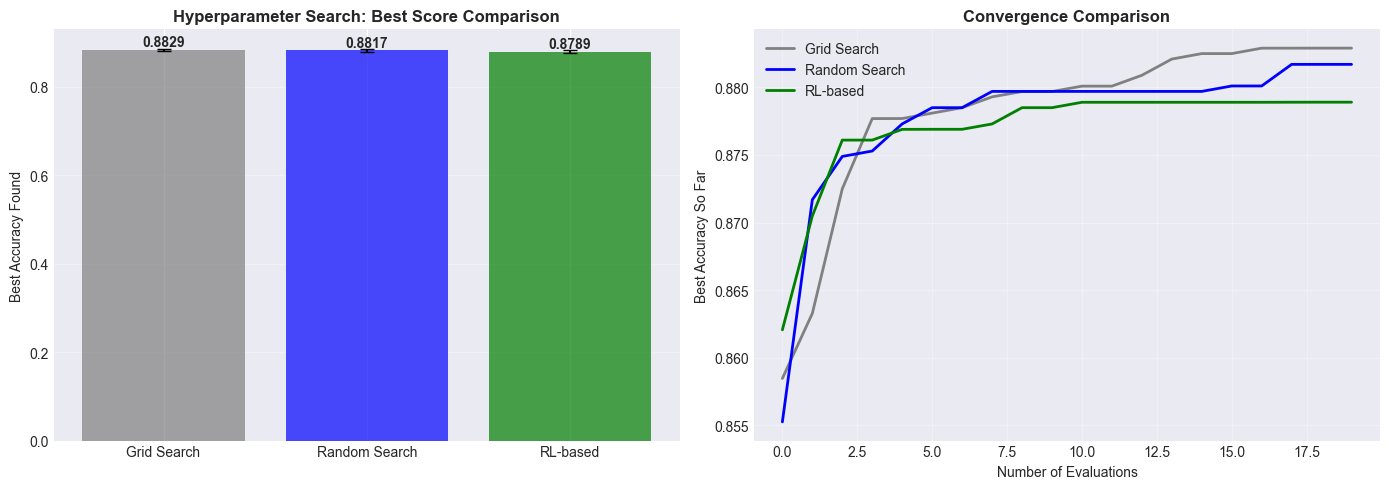


📊 Summary:
   Grid Search:   0.8829 ± 0.0016
   Random Search: 0.8817 ± 0.0032
   RL-based:      0.8789 ± 0.0035

   Note: RL-based search learns to prioritize promising regions of the search space.


In [129]:
# Visualize comparison results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Best score comparison
ax1 = axes[0]
methods = ['Grid Search', 'Random Search', 'RL-based']
best_scores = [
    [r[0] for r in grid_results],
    [r[0] for r in random_results],
    [r[0] for r in rl_results]
]

means = [np.mean(s) for s in best_scores]
stds = [np.std(s) for s in best_scores]

bars = ax1.bar(methods, means, yerr=stds, capsize=5, 
               color=['gray', 'blue', 'green'], alpha=0.7)
ax1.set_ylabel('Best Accuracy Found')
ax1.set_title('Hyperparameter Search: Best Score Comparison', fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

for bar, mean in zip(bars, means):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002,
             f'{mean:.4f}', ha='center', va='bottom', fontweight='bold')

# Plot 2: Convergence curves
ax2 = axes[1]

# Average convergence curves
def get_best_so_far(scores_list):
    """Convert scores to best-so-far."""
    all_curves = []
    for _, scores in scores_list:
        best_so_far = []
        best = 0
        for s in scores:
            best = max(best, s)
            best_so_far.append(best)
        all_curves.append(best_so_far)
    
    # Pad to same length
    max_len = max(len(c) for c in all_curves)
    padded = []
    for c in all_curves:
        padded.append(c + [c[-1]] * (max_len - len(c)))
    
    return np.mean(padded, axis=0)

grid_curve = get_best_so_far(grid_results)
random_curve = get_best_so_far(random_results)
rl_curve = get_best_so_far(rl_results)

ax2.plot(grid_curve, 'gray', linewidth=2, label='Grid Search')
ax2.plot(random_curve, 'blue', linewidth=2, label='Random Search')
ax2.plot(rl_curve, 'green', linewidth=2, label='RL-based')

ax2.set_xlabel('Number of Evaluations')
ax2.set_ylabel('Best Accuracy So Far')
ax2.set_title('Convergence Comparison', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Summary:")
print(f"   Grid Search:   {np.mean([r[0] for r in grid_results]):.4f} ± {np.std([r[0] for r in grid_results]):.4f}")
print(f"   Random Search: {np.mean([r[0] for r in random_results]):.4f} ± {np.std([r[0] for r in random_results]):.4f}")
print(f"   RL-based:      {np.mean([r[0] for r in rl_results]):.4f} ± {np.std([r[0] for r in rl_results]):.4f}")
print("\n   Note: RL-based search learns to prioritize promising regions of the search space.")

<a id='game-playing'></a>
### Game Playing

**Game AI and Strategy Learning**

Games have been a proving ground for RL since the field's inception. Key milestones include:

- **TD-Gammon (1992)**: Backgammon at expert level
- **Deep Blue (1997)**: Chess (primarily search-based)
- **AlphaGo (2016)**: Go at superhuman level
- **AlphaStar (2019)**: StarCraft II at grandmaster level
- **OpenAI Five (2019)**: Dota 2 at professional level

**Why Games are Great for RL:**

1. **Clear Rules**: Well-defined state transitions and legal actions
2. **Objective Rewards**: Win/lose provides unambiguous feedback
3. **Self-Play**: Can generate unlimited training data
4. **Measurable Progress**: Can compare against human experts

**Key Techniques:**

| Technique | Description | Used In |
|-----------|-------------|--------|
| Self-Play | Agent plays against itself | AlphaGo, AlphaZero |
| MCTS | Monte Carlo Tree Search for planning | AlphaGo, MuZero |
| Population Training | Multiple agents evolve together | OpenAI Five |
| Curriculum Learning | Gradually increase difficulty | Many games |

Let's implement a simple game environment and train an RL agent to play it.

In [130]:
# Tic-Tac-Toe Environment and RL Agent
import numpy as np
import matplotlib.pyplot as plt

class TicTacToe:
    """
    Tic-Tac-Toe environment.
    
    Board positions: 0-8 (3x3 grid)
    Players: 1 (X) and -1 (O)
    """
    
    def __init__(self):
        self.reset()
    
    def reset(self):
        """Reset the board."""
        self.board = np.zeros(9, dtype=int)
        self.current_player = 1  # X starts
        self.done = False
        self.winner = None
        return self._get_state()
    
    def _get_state(self):
        """Return current state."""
        # State from current player's perspective
        return self.board * self.current_player
    
    def _check_winner(self):
        """Check if there's a winner."""
        # Winning combinations
        lines = [
            [0, 1, 2], [3, 4, 5], [6, 7, 8],  # Rows
            [0, 3, 6], [1, 4, 7], [2, 5, 8],  # Columns
            [0, 4, 8], [2, 4, 6]              # Diagonals
        ]
        
        for line in lines:
            total = sum(self.board[i] for i in line)
            if total == 3:
                return 1  # X wins
            elif total == -3:
                return -1  # O wins
        
        return None
    
    def get_valid_actions(self):
        """Return list of valid actions (empty positions)."""
        return [i for i in range(9) if self.board[i] == 0]
    
    def step(self, action):
        """
        Make a move.
        
        Args:
            action: Position to place mark (0-8)
            
        Returns:
            state, reward, done, info
        """
        if self.done:
            return self._get_state(), 0, True, {'winner': self.winner}
        
        if self.board[action] != 0:
            # Invalid move - heavy penalty
            return self._get_state(), -10, True, {'winner': None, 'invalid': True}
        
        # Make move
        self.board[action] = self.current_player
        
        # Check for winner
        self.winner = self._check_winner()
        
        if self.winner is not None:
            self.done = True
            # Reward from current player's perspective
            reward = 1 if self.winner == self.current_player else -1
        elif len(self.get_valid_actions()) == 0:
            # Draw
            self.done = True
            reward = 0.5  # Small reward for draw
            self.winner = 0
        else:
            reward = 0
        
        # Switch player
        self.current_player *= -1
        
        info = {
            'winner': self.winner,
            'current_player': self.current_player
        }
        
        return self._get_state(), reward, self.done, info
    
    def render(self):
        """Print the board."""
        symbols = {0: '.', 1: 'X', -1: 'O'}
        print()
        for i in range(3):
            row = ' '.join(symbols[self.board[i*3 + j]] for j in range(3))
            print(f"  {row}")
        print()


class TicTacToeAgent:
    """Q-learning agent for Tic-Tac-Toe."""
    
    def __init__(self, epsilon=0.3, lr=0.1, gamma=0.95):
        self.epsilon = epsilon
        self.lr = lr
        self.gamma = gamma
        self.q_table = {}
    
    def _state_to_key(self, state):
        """Convert state to hashable key."""
        return tuple(state)
    
    def get_action(self, state, valid_actions, training=True):
        """Select action using epsilon-greedy."""
        if training and np.random.random() < self.epsilon:
            return np.random.choice(valid_actions)
        
        key = self._state_to_key(state)
        if key not in self.q_table:
            self.q_table[key] = np.zeros(9)
        
        # Get Q-values for valid actions only
        q_values = self.q_table[key]
        valid_q = [(a, q_values[a]) for a in valid_actions]
        
        # Select best valid action
        best_q = max(q for _, q in valid_q)
        best_actions = [a for a, q in valid_q if q == best_q]
        
        return np.random.choice(best_actions)
    
    def update(self, state, action, reward, next_state, done, next_valid_actions):
        """Update Q-values."""
        key = self._state_to_key(state)
        next_key = self._state_to_key(next_state)
        
        if key not in self.q_table:
            self.q_table[key] = np.zeros(9)
        if next_key not in self.q_table:
            self.q_table[next_key] = np.zeros(9)
        
        if done:
            target = reward
        else:
            # Max Q-value for valid next actions
            next_q = max(self.q_table[next_key][a] for a in next_valid_actions) if next_valid_actions else 0
            target = reward + self.gamma * next_q
        
        self.q_table[key][action] += self.lr * (target - self.q_table[key][action])


class RandomPlayer:
    """Random player for baseline comparison."""
    
    def get_action(self, state, valid_actions, training=True):
        return np.random.choice(valid_actions)


print("Tic-Tac-Toe Environment created!")
print("\nBoard positions:")
print("  0 | 1 | 2")
print("  ---------")
print("  3 | 4 | 5")
print("  ---------")
print("  6 | 7 | 8")

Tic-Tac-Toe Environment created!

Board positions:
  0 | 1 | 2
  ---------
  3 | 4 | 5
  ---------
  6 | 7 | 8


In [131]:
# Train agent through self-play
np.random.seed(42)

env = TicTacToe()
agent = TicTacToeAgent(epsilon=0.3)

# Training through self-play
n_episodes = 10000
wins = {'agent': 0, 'opponent': 0, 'draw': 0}
win_rates = []

print("Training through self-play...")
print("="*50)

for episode in range(n_episodes):
    state = env.reset()
    
    # Store experience for both players
    experiences = {1: [], -1: []}
    
    while not env.done:
        valid_actions = env.get_valid_actions()
        player = env.current_player
        
        # Both players use the same agent (self-play)
        action = agent.get_action(state, valid_actions)
        
        next_state, reward, done, info = env.step(action)
        
        # Store experience
        experiences[player].append({
            'state': state.copy(),
            'action': action,
            'reward': reward,
            'next_state': next_state.copy(),
            'done': done,
            'next_valid': env.get_valid_actions() if not done else []
        })
        
        state = next_state
    
    # Update Q-values for both players
    for player in [1, -1]:
        for exp in experiences[player]:
            # Adjust reward based on final outcome
            if env.winner == player:
                final_reward = 1
            elif env.winner == -player:
                final_reward = -1
            else:
                final_reward = 0.1  # Draw
            
            agent.update(
                exp['state'] * player,  # State from player's perspective
                exp['action'],
                final_reward if exp['done'] else 0,
                exp['next_state'] * player,
                exp['done'],
                exp['next_valid']
            )
    
    # Track wins (agent as player 1)
    if env.winner == 1:
        wins['agent'] += 1
    elif env.winner == -1:
        wins['opponent'] += 1
    else:
        wins['draw'] += 1
    
    # Record win rate every 500 episodes
    if (episode + 1) % 500 == 0:
        recent_rate = wins['agent'] / (episode + 1)
        win_rates.append(recent_rate)
        
        if (episode + 1) % 2000 == 0:
            print(f"Episode {episode+1:5d} | Win Rate: {recent_rate*100:.1f}% | "
                  f"States Learned: {len(agent.q_table)}")

# Decay epsilon for evaluation
agent.epsilon = 0.05

print(f"\nTraining complete!")
print(f"Final stats: {wins['agent']} wins, {wins['opponent']} losses, {wins['draw']} draws")
print(f"States in Q-table: {len(agent.q_table)}")

Training through self-play...
Episode  2000 | Win Rate: 62.3% | States Learned: 6325
Episode  4000 | Win Rate: 66.4% | States Learned: 7158
Episode  6000 | Win Rate: 68.0% | States Learned: 7406
Episode  8000 | Win Rate: 69.5% | States Learned: 7510
Episode 10000 | Win Rate: 70.2% | States Learned: 7545

Training complete!
Final stats: 7022 wins, 2019 losses, 959 draws
States in Q-table: 7545


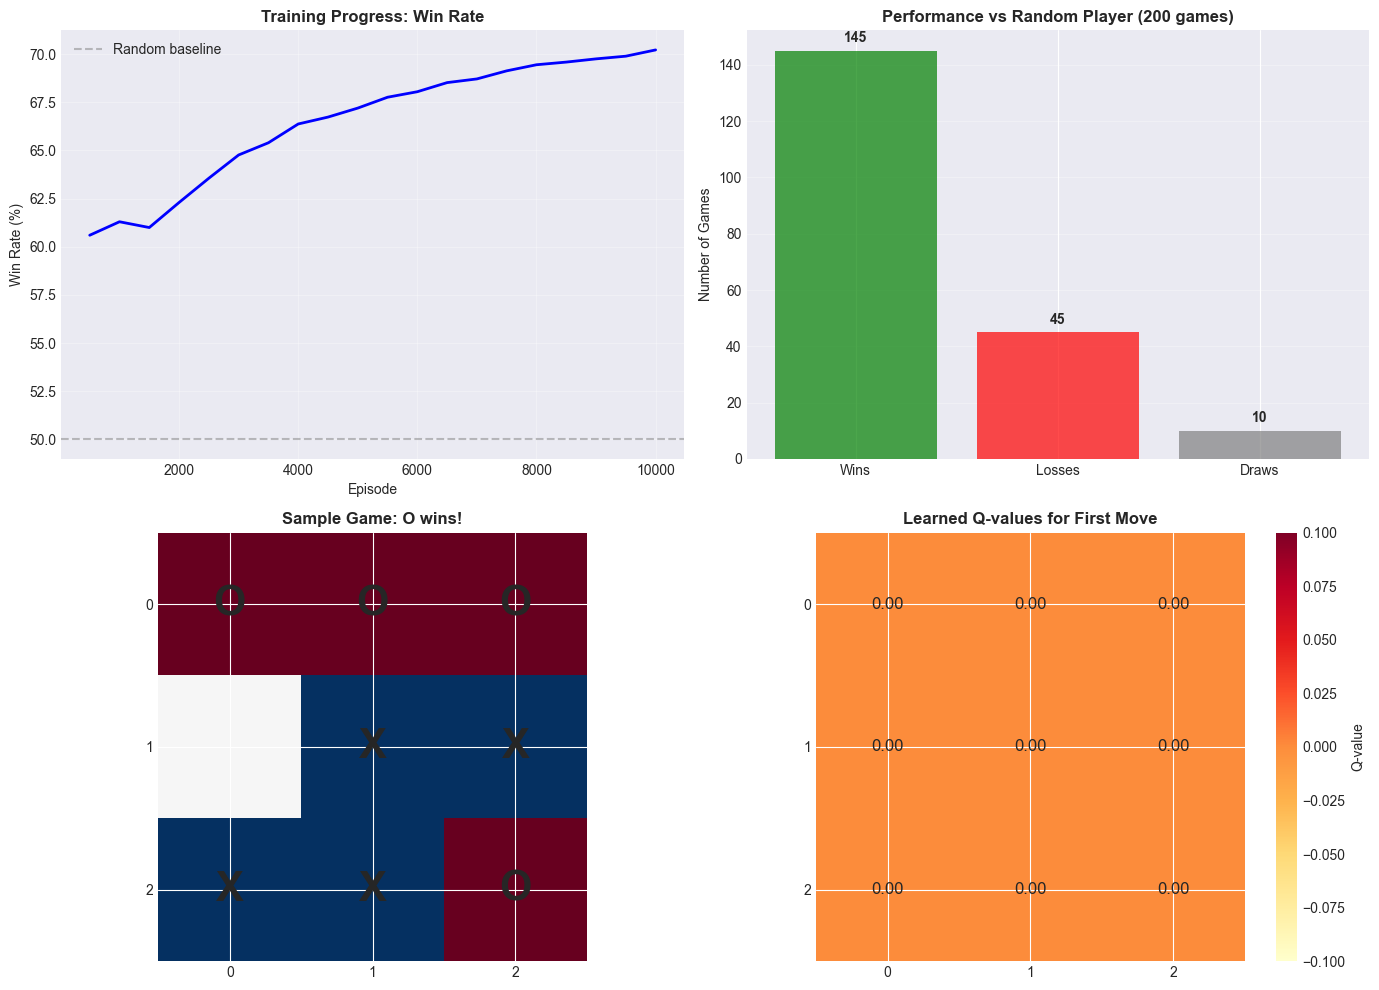


📊 Test Results vs Random Player:
   Wins:   145 (72%)
   Losses: 45 (22%)
   Draws:  10 (5%)

   The agent learns that center (position 4) is the best opening move!


In [132]:
# Evaluate and visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Win rate over training
ax1 = axes[0, 0]
episodes = np.arange(500, n_episodes + 1, 500)
ax1.plot(episodes, np.array(win_rates) * 100, 'b-', linewidth=2)
ax1.axhline(y=50, color='gray', linestyle='--', alpha=0.5, label='Random baseline')
ax1.set_xlabel('Episode')
ax1.set_ylabel('Win Rate (%)')
ax1.set_title('Training Progress: Win Rate', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Test against random player
ax2 = axes[0, 1]

def test_against_random(agent, n_games=100):
    """Test agent against random player."""
    results = {'win': 0, 'loss': 0, 'draw': 0}
    
    for game in range(n_games):
        env = TicTacToe()
        state = env.reset()
        
        # Alternate who goes first
        agent_player = 1 if game % 2 == 0 else -1
        
        while not env.done:
            valid_actions = env.get_valid_actions()
            
            if env.current_player == agent_player:
                action = agent.get_action(state * agent_player, valid_actions, training=False)
            else:
                action = np.random.choice(valid_actions)
            
            state, _, _, _ = env.step(action)
        
        if env.winner == agent_player:
            results['win'] += 1
        elif env.winner == -agent_player:
            results['loss'] += 1
        else:
            results['draw'] += 1
    
    return results

results = test_against_random(agent, n_games=200)
labels = ['Wins', 'Losses', 'Draws']
values = [results['win'], results['loss'], results['draw']]
colors = ['green', 'red', 'gray']

bars = ax2.bar(labels, values, color=colors, alpha=0.7)
ax2.set_ylabel('Number of Games')
ax2.set_title('Performance vs Random Player (200 games)', fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

for bar, val in zip(bars, values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             str(val), ha='center', va='bottom', fontweight='bold')

# Plot 3: Sample game visualization
ax3 = axes[1, 0]

# Play a sample game
env = TicTacToe()
state = env.reset()
moves = []

while not env.done:
    valid_actions = env.get_valid_actions()
    
    if env.current_player == 1:
        action = agent.get_action(state, valid_actions, training=False)
    else:
        action = np.random.choice(valid_actions)
    
    moves.append((env.current_player, action))
    state, _, _, _ = env.step(action)

# Visualize final board
board_display = np.zeros((3, 3))
for player, pos in moves:
    board_display[pos // 3, pos % 3] = player

im = ax3.imshow(board_display, cmap='RdBu', vmin=-1, vmax=1)
ax3.set_xticks([0, 1, 2])
ax3.set_yticks([0, 1, 2])

# Add X and O symbols
for i in range(3):
    for j in range(3):
        val = board_display[i, j]
        if val == 1:
            ax3.text(j, i, 'X', ha='center', va='center', fontsize=30, fontweight='bold')
        elif val == -1:
            ax3.text(j, i, 'O', ha='center', va='center', fontsize=30, fontweight='bold')

winner_text = 'X wins!' if env.winner == 1 else ('O wins!' if env.winner == -1 else 'Draw!')
ax3.set_title(f'Sample Game: {winner_text}', fontweight='bold')

# Plot 4: Q-value heatmap for empty board
ax4 = axes[1, 1]

empty_state = tuple([0] * 9)
if empty_state in agent.q_table:
    q_values = agent.q_table[empty_state].reshape(3, 3)
else:
    q_values = np.zeros((3, 3))

im = ax4.imshow(q_values, cmap='YlOrRd')
ax4.set_xticks([0, 1, 2])
ax4.set_yticks([0, 1, 2])

for i in range(3):
    for j in range(3):
        ax4.text(j, i, f'{q_values[i, j]:.2f}', ha='center', va='center', fontsize=12)

ax4.set_title('Learned Q-values for First Move', fontweight='bold')
plt.colorbar(im, ax=ax4, label='Q-value')

plt.tight_layout()
plt.show()

print(f"\n📊 Test Results vs Random Player:")
print(f"   Wins:   {results['win']} ({results['win']/200*100:.0f}%)")
print(f"   Losses: {results['loss']} ({results['loss']/200*100:.0f}%)")
print(f"   Draws:  {results['draw']} ({results['draw']/200*100:.0f}%)")
print(f"\n   The agent learns that center (position 4) is the best opening move!")

<a id='energy'></a>
### Energy Management

**Smart Grid Optimization with RL**

Energy management is a critical application of RL with significant environmental and economic impact:

**Key Applications:**

1. **Battery Storage Optimization**
   - When to charge/discharge batteries
   - Arbitrage between peak and off-peak prices
   - Grid stability support

2. **Demand Response**
   - Shift flexible loads to off-peak hours
   - Reduce peak demand charges
   - Balance renewable generation

3. **HVAC Control**
   - Optimize heating/cooling schedules
   - Pre-cool/pre-heat based on forecasts
   - Comfort vs efficiency trade-offs

4. **Renewable Integration**
   - Handle intermittent solar/wind
   - Coordinate with storage
   - Minimize curtailment

**Why RL for Energy?**

| Challenge | RL Advantage |
|-----------|-------------|
| Uncertain demand | Learns from patterns |
| Variable prices | Adapts to market dynamics |
| Weather dependence | Incorporates forecasts |
| Complex constraints | Handles multi-objective optimization |

**MDP Formulation:**

**State**: Battery level, current price, demand forecast, time of day, weather

**Action**: Charge rate, discharge rate, or idle

**Reward**: Negative electricity cost + penalties for constraint violations

In [141]:
class EnergyStorageEnv:
    """Energy storage management environment."""
    
    def __init__(self, battery_capacity=50, max_charge_rate=10, max_discharge_rate=10):
        """
        Initialize energy storage environment.
        
        Args:
            battery_capacity: Maximum battery capacity (kWh)
            max_charge_rate: Maximum charging rate (kW)
            max_discharge_rate: Maximum discharging rate (kW)
        """
        self.battery_capacity = battery_capacity
        self.max_charge_rate = max_charge_rate
        self.max_discharge_rate = max_discharge_rate
        
        # Generate daily price and demand profiles
        self._generate_profiles()
        
        # State space: [battery_level, price, demand, hour, next_3_prices]
        self.state_dim = 7
        # Action space: 0=discharge, 1=hold, 2=charge
        self.action_dim = 3
        
        self.reset()
    
    def _generate_profiles(self):
        """Generate realistic daily price and demand profiles."""
        hours = np.arange(24)
        
        # Price profile: higher during peak hours (morning and evening)
        self.prices = (
            0.10 +  # Base price
            0.08 * np.sin((hours - 6) * np.pi / 12) +  # Daily cycle
            0.05 * np.sin((hours - 18) * np.pi / 6)    # Evening peak
        )
        self.prices = np.maximum(self.prices, 0.05)  # Minimum price
        
        # Demand profile: higher during day, peaks in evening
        self.demand = (
            30 +  # Base demand
            20 * np.sin((hours - 6) * np.pi / 12) +  # Daily cycle
            15 * np.sin((hours - 18) * np.pi / 6)    # Evening peak
        )
        self.demand = np.maximum(self.demand, 10)  # Minimum demand
    
    def reset(self):
        """Reset environment to initial state."""
        self.current_hour = 0
        self.battery_level = self.battery_capacity * 0.5  # Start at 50%
        self.total_cost = 0
        self.battery_history = [self.battery_level]
        return self._get_state()
    
    def _get_state(self):
        """Get current state representation."""
        # Use modulo to ensure hour is always in valid range [0, 23]
        hour = self.current_hour % 24
        
        # Normalize features
        state = np.array([
            self.battery_level / self.battery_capacity,  # Battery SOC
            self.prices[hour] / 0.3,  # Normalized price
            self.demand[hour] / 100,  # Normalized demand
            hour / 24,  # Time of day
            # Look-ahead features (next 3 hours) with modulo wrapping
            self.prices[(hour + 1) % 24] / 0.3,
            self.prices[(hour + 2) % 24] / 0.3,
            self.prices[(hour + 3) % 24] / 0.3,
        ], dtype=np.float32)
        
        return state
    
    def step(self, action):
        """
        Execute one time step.
        
        Args:
            action: 0=discharge, 1=hold, 2=charge
            
        Returns:
            next_state, reward, done, info
        """
        # Ensure current_hour is valid before processing
        hour = self.current_hour % 24
        
        price = self.prices[hour]
        demand = self.demand[hour]
        
        # Execute action
        if action == 0:  # Discharge
            discharge = min(self.max_discharge_rate, self.battery_level)
            self.battery_level -= discharge
            grid_power = max(0, demand - discharge)
        elif action == 1:  # Hold
            grid_power = demand
        else:  # Charge (action == 2)
            charge = min(self.max_charge_rate, 
                        self.battery_capacity - self.battery_level)
            self.battery_level += charge
            grid_power = demand + charge
        
        # Calculate cost for this hour
        hour_cost = grid_power * price
        self.total_cost += hour_cost
        
        # Store battery level
        self.battery_history.append(self.battery_level)
        
        # Calculate reward (negative cost, with bonuses)
        reward = -hour_cost
        
        # Bonus for using battery during high prices
        if price > 0.15 and action == 0:
            reward += 0.5
        
        # Bonus for charging during low prices
        if price < 0.10 and action == 2:
            reward += 0.3
        
        # Small penalty for extreme battery levels
        soc = self.battery_level / self.battery_capacity
        if soc < 0.2 or soc > 0.8:
            reward -= 0.1
        else:
            reward += 0.1
        
        # Move to next hour
        self.current_hour += 1
        
        # Check if day is complete (BEFORE getting next state)
        done = self.current_hour >= 24
        
        # Get next state (will handle hour wrapping properly)
        next_state = self._get_state()
        
        info = {
            'cost': hour_cost,
            'total_cost': self.total_cost,
            'battery_level': self.battery_level,
            'price': price,
            'demand': demand
        }
        
        return next_state, reward, done, info


print("EnergyStorageEnv class defined!")
print("Features:")
print("  • Realistic price and demand profiles")
print("  • Battery storage with capacity constraints")
print("  • Reward shaping for optimal behavior")
print("  • State includes look-ahead price information")


EnergyStorageEnv class defined!
Features:
  • Realistic price and demand profiles
  • Battery storage with capacity constraints
  • Reward shaping for optimal behavior
  • State includes look-ahead price information


In [142]:
# Train energy management agent
np.random.seed(42)
env = EnergyStorageEnv()
agent = EnergyAgent()

n_episodes = 500
episode_costs = []

print("Training Energy Management Agent...")
print("="*50)

for episode in range(n_episodes):
    state = env.reset()
    # Handle both old and new Gym API
    if isinstance(state, tuple):
        state = state[0]
    
    done = False
    
    while not done:
        action = agent.get_action(state)
        
        # Handle different return formats from env.step()
        step_result = env.step(action)
        
        if len(step_result) == 5:
            # New Gym API (>=0.26): returns (state, reward, terminated, truncated, info)
            next_state, reward, terminated, truncated, info = step_result
            done = terminated or truncated
        elif len(step_result) == 4:
            # Old Gym API: returns (state, reward, done, info)
            next_state, reward, done, info = step_result
        else:
            raise ValueError(f"Unexpected number of values from env.step(): {len(step_result)}")
        
        agent.update(state, action, reward, next_state, done)
        state = next_state
    
    if 'total_cost' in info:
        episode_costs.append(info['total_cost'])
    
    if (episode + 1) % 100 == 0:
        if len(episode_costs) >= 100:
            avg_cost = np.mean(episode_costs[-100:])
            print(f"Episode {episode+1:3d} | Avg Daily Cost: ${avg_cost:.2f} | "
                  f"Epsilon: {agent.epsilon:.3f}")

print("\nTraining complete!")
print(f"Total episodes with cost data: {len(episode_costs)}")
if len(episode_costs) > 0:
    print(f"Final average cost (last 100): ${np.mean(episode_costs[-100:]):.2f}")


Training Energy Management Agent...
Episode 100 | Avg Daily Cost: $104.12 | Epsilon: 0.606
Episode 200 | Avg Daily Cost: $102.84 | Epsilon: 0.367
Episode 300 | Avg Daily Cost: $101.39 | Epsilon: 0.222
Episode 400 | Avg Daily Cost: $100.50 | Epsilon: 0.135
Episode 500 | Avg Daily Cost: $100.65 | Epsilon: 0.082

Training complete!
Total episodes with cost data: 500
Final average cost (last 100): $100.65
